## The purpose of this document is to build our first attempt at a VAR Model with the following steps

1. Differencing each feature then confirming stationarity using the Augmented Dickey-Fuller (ADF)
test.
2. Using Granger causality tests to identify predictors that “lag” GDP. Only these predictors will be
included in the initial VAR model.
3. Select order (p) of VAR model based on lowest AIC value.
4. Train VAR model of order (p). Experiment with different train test splits.
5. Check model residuals for serial correlation using Durbin Watson’s statistic. If serial correlation is
a problem, try making higher order VAR models or try adding more variables into the model.
6. Forecast GDP at different horizons.
7. Un-difference (inverse transform) the forecasted values to get the “real” forecast values in the
correct units.
8. Plot the forecast versus actual data for different time horizons and evaluate the forecast accuracy
using metrics such as: MSE, MAE, RMSE, MAPE, and R2.

**The above steps may need to be re-ordered based on the page we use to build the model (https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/#google_vignette)**.

Below are the libraries needed to run all the code.

In [1]:
#pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np

"data" is a data frame that holds all of our financial data from 1976 to 2023. "dataM" includes the arithmetic and weighted average M-SCores, and inly runs until 2013.

In [2]:
#The path depends on who is running the code
#data = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\Team36_group_project\Data\merged_data20231031125447.csv")
#dataM = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\Team36_group_project\Data\merged_data_mscore_wab20231031125447.csv")
data = pd.read_csv(r"/Users/lukaszsledz/Documents/GaTech/MGT_6203/Project/Team-36/Data/merged_data20231031125447.csv")
dataM = pd.read_csv(r"/Users/lukaszsledz/Documents/GaTech/MGT_6203/Project/Team-36/Data/merged_data_mscore_wab20231031125447.csv")
# data = pd.read_csv(r"C:\Users\Kerstin\Desktop\GT\6203\Project\merged_data20231031125447.csv")
# dataM = pd.read_csv(r"C:\Users\Kerstin\Desktop\GT\6203\Project\merged_data_mscore_wab20231031125447.csv")

In [4]:
display(data.head())
display(dataM.head())

,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,Quarter,indu return,indu return trend,indu velocity,indu acceleration,GDPC1,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,T10Y2Y acceleration
0,-0.001234,0.000012,0.000101,-0.000026,1976Q3,0.008929,-0.000165,0.000116,-0.000029,6012.356,63.4,63.333333,-0.30,0.350,1.22,1.289292,0.004792,-0.000260
1,0.005427,0.000090,-0.000076,-0.000062,1976Q4,0.017706,0.000179,-0.000052,-0.000025,6083.391,64.5,64.066667,0.45,-0.075,1.47,1.399542,0.001042,-0.000167
2,-0.001218,-0.000570,0.000076,0.000005,1977Q1,0.009097,-0.000502,0.000065,-0.000006,6201.659,66.6,66.866667,1.30,-0.325,1.41,1.292667,-0.002250,0.000115
3,0.003696,0.000019,-0.000013,-0.000050,1977Q2,0.015745,-0.000424,-0.000023,-0.000057,6313.559,65.5,65.933333,-1.45,0.300,1.12,1.036417,-0.007271,0.000135
4,0.007094,-0.000471,-0.000031,-0.000099,1977Q3,0.021129,-0.000702,-0.000023,-0.000107,6313.697,63.7,63.866667,0.05,0.675,0.59,0.627292,-0.005333,0.000406


,Quarter,Avg. M-Score,Weighted_M,Count,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,indu return,indu return trend,...,WAB,average beta trend,average MCAP trend,WAB trend,average beta velocity,average beta acceleration,average MCAP velocity,average MCAP acceleration,WAB velocity,WAB acceleration
0,1977Q2,-2.928935,-3.587477,54.0,0.003696,0.000019,-0.000013,-5.000753e-05,0.015745,-0.000424,...,0.000188,0.588399,156646.124973,0.000188,-0.001597,0.000169,1596.925166,-1140.399834,4.257808e-07,-3.720542e-07
1,1977Q3,-2.892064,-3.602709,58.0,0.007094,-0.000471,-0.000031,-9.916646e-05,0.021129,-0.000702,...,0.000188,0.588532,154317.129999,0.000188,0.006019,0.004604,-1099.740210,1090.703081,4.579012e-07,3.254375e-07
2,1977Q4,-2.905240,-3.580334,58.0,0.001685,-0.000529,-0.000044,-1.726593e-05,0.016896,-0.000693,...,0.000191,0.619210,155068.429908,0.000190,0.006875,-0.004539,-1426.625694,-1090.236012,2.057119e-07,-4.117815e-07
3,1978Q1,-2.762485,-3.393768,58.0,-0.002237,0.001173,0.000151,-4.456153e-07,0.011703,0.001397,...,0.000191,0.611632,156117.118476,0.000192,-0.010227,-0.000748,6049.221168,2017.425039,1.685134e-06,3.986992e-07
4,1978Q2,-2.857087,-3.376276,58.0,-0.000419,0.000882,0.000099,-5.849000e-06,0.010869,0.000848,...,0.000195,0.598109,172566.120580,0.000195,0.000685,0.002822,4570.248510,78.710149,-1.510248e-07,-7.294480e-07


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sp500 return          187 non-null    float64
 1   sp500 return trend    187 non-null    float64
 2   sp500 velocity        187 non-null    float64
 3   sp500 acceleration    187 non-null    float64
 4   Quarter               187 non-null    object 
 5   indu return           187 non-null    float64
 6   indu return trend     187 non-null    float64
 7   indu velocity         187 non-null    float64
 8   indu acceleration     187 non-null    float64
 9   GDPC1                 187 non-null    float64
 10  WPSID62               187 non-null    float64
 11  WPSID62 trend         187 non-null    float64
 12  WPSID62 velocity      187 non-null    float64
 13  WPSID62 acceleration  187 non-null    float64
 14  T10Y2Y                187 non-null    float64
 15  T10Y2Y trend          1

We convert the Quarter columns to time series objects to be able to make clearer plots of the data.

In [6]:
#convert the quarter column in both datasets to PeriodIndex type bc we want to study the data sets as time series data
q = pd.to_datetime(data.Quarter)
qM = pd.to_datetime(dataM.Quarter)

data["date"] = q
dataM["date"]=qM

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sp500 return          187 non-null    float64       
 1   sp500 return trend    187 non-null    float64       
 2   sp500 velocity        187 non-null    float64       
 3   sp500 acceleration    187 non-null    float64       
 4   Quarter               187 non-null    object        
 5   indu return           187 non-null    float64       
 6   indu return trend     187 non-null    float64       
 7   indu velocity         187 non-null    float64       
 8   indu acceleration     187 non-null    float64       
 9   GDPC1                 187 non-null    float64       
 10  WPSID62               187 non-null    float64       
 11  WPSID62 trend         187 non-null    float64       
 12  WPSID62 velocity      187 non-null    float64       
 13  WPSID62 acceleration

In [8]:
data.columns

Index(['sp500 return', 'sp500 return trend', 'sp500 velocity',
       'sp500 acceleration', 'Quarter', 'indu return', 'indu return trend',
       'indu velocity', 'indu acceleration', 'GDPC1', 'WPSID62',
       'WPSID62 trend', 'WPSID62 velocity', 'WPSID62 acceleration', 'T10Y2Y',
       'T10Y2Y trend', 'T10Y2Y velocity', 'T10Y2Y acceleration', 'date'],
      dtype='object')

Plots of the S&P 500 data (returns/quarter, trend, velocity, and acceleration.)

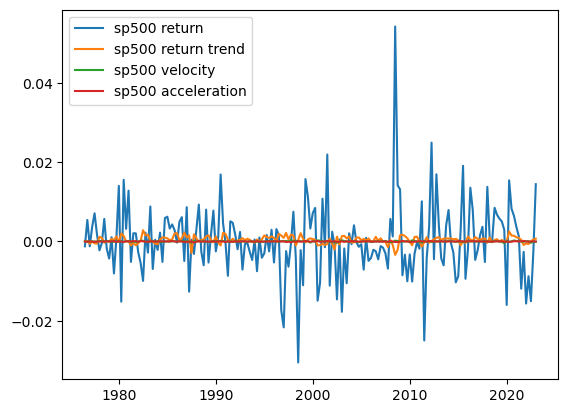

In [9]:
#sp500
plt.plot(data["date"], data[['sp500 return', 'sp500 return trend', 'sp500 velocity',
       'sp500 acceleration']], label=['sp500 return', 'sp500 return trend', 'sp500 velocity',
       'sp500 acceleration'])
plt.legend()

Plot of the INDU (Dow Jones?) return data (return, trend, velocity, and acceleration.)

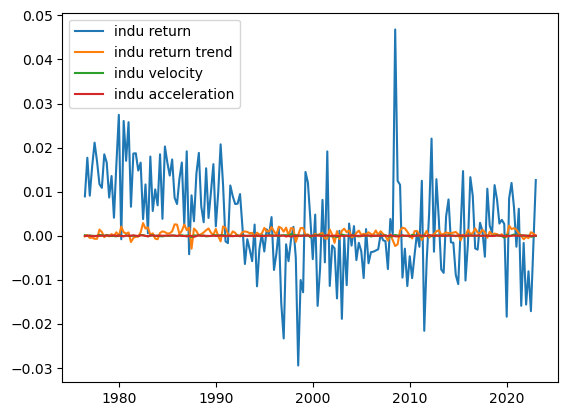

In [10]:
plt.plot(data["date"], data[['indu return', 'indu return trend',
       'indu velocity', 'indu acceleration']], label=['indu return', 'indu return trend',
       'indu velocity', 'indu acceleration'])
plt.legend()



PLot of WPSID62 (?) data (trend, velocity, and acceleration.)

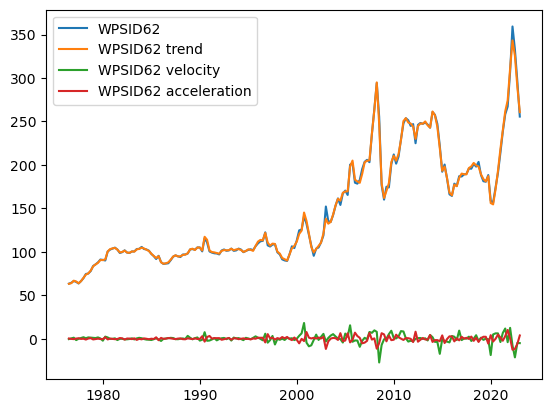

In [11]:
plt.plot(data["date"], data[['WPSID62',
       'WPSID62 trend', 'WPSID62 velocity', 'WPSID62 acceleration']], label=['WPSID62',
       'WPSID62 trend', 'WPSID62 velocity', 'WPSID62 acceleration'])
plt.legend()


Plot of yield curve data (yield curve, trend, velocity, and acceleration.)

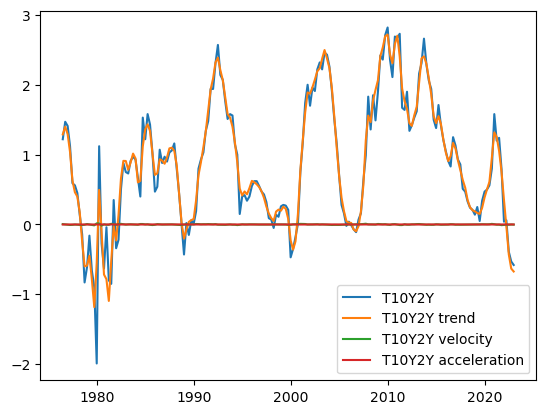

In [12]:
plt.plot(data["date"], data[['T10Y2Y',
       'T10Y2Y trend', 'T10Y2Y velocity', 'T10Y2Y acceleration']], label=['T10Y2Y',
       'T10Y2Y trend', 'T10Y2Y velocity', 'T10Y2Y acceleration'])
plt.legend()

PLot of real GDP. Note the massive dip in 2020. This is a problem when we run Granger Causality tests later.

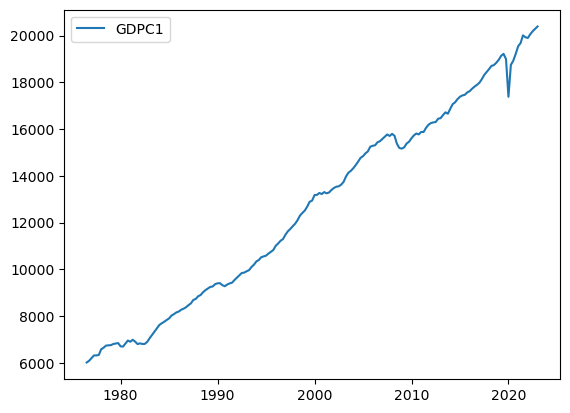

In [13]:
plt.plot(data["date"], data['GDPC1'], label='GDPC1')
plt.legend()

In [14]:
dataM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Quarter                    145 non-null    object        
 1   Avg. M-Score               145 non-null    float64       
 2   Weighted_M                 145 non-null    float64       
 3   Count                      145 non-null    float64       
 4   sp500 return               145 non-null    float64       
 5   sp500 return trend         145 non-null    float64       
 6   sp500 velocity             145 non-null    float64       
 7   sp500 acceleration         145 non-null    float64       
 8   indu return                145 non-null    float64       
 9   indu return trend          145 non-null    float64       
 10  indu velocity              145 non-null    float64       
 11  indu acceleration          145 non-null    float64       
 12  GDPC1   

In [15]:
dataM.columns

Index(['Quarter', 'Avg. M-Score', 'Weighted_M', 'Count', 'sp500 return',
       'sp500 return trend', 'sp500 velocity', 'sp500 acceleration',
       'indu return', 'indu return trend', 'indu velocity',
       'indu acceleration', 'GDPC1', 'WPSID62', 'WPSID62 trend',
       'WPSID62 velocity', 'WPSID62 acceleration', 'T10Y2Y', 'T10Y2Y trend',
       'T10Y2Y velocity', 'T10Y2Y acceleration', 'average beta',
       'average MCAP', 'WAB', 'average beta trend', 'average MCAP trend',
       'WAB trend', 'average beta velocity', 'average beta acceleration',
       'average MCAP velocity', 'average MCAP acceleration', 'WAB velocity',
       'WAB acceleration', 'date'],
      dtype='object')

Plot of average and weighted average M-Score.

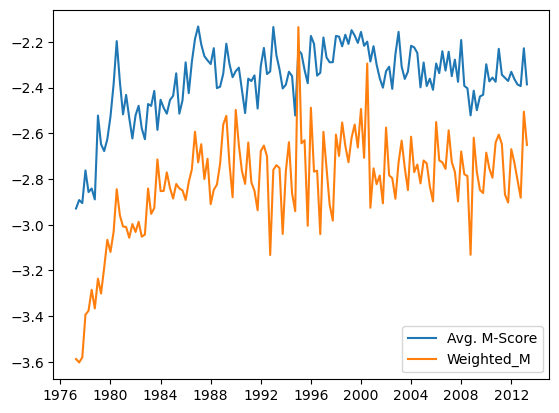

In [16]:
plt.plot(dataM["date"], dataM[['Avg. M-Score', 'Weighted_M']], label=['Avg. M-Score', 'Weighted_M'])
plt.legend()



Plot of average beta (beta, trend, velocity, and acceleration.)

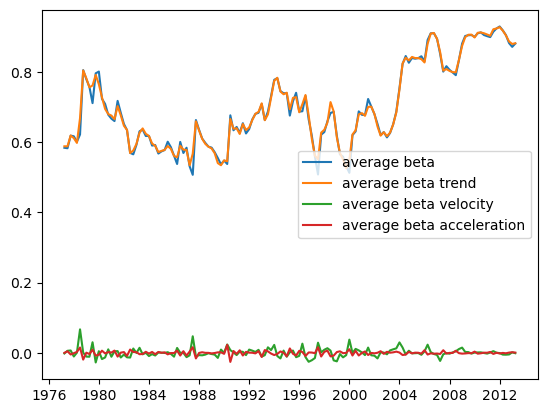

In [17]:
plt.plot(dataM["date"], dataM[['average beta','average beta trend','average beta velocity','average beta acceleration']], label=['average beta','average beta trend ','average beta velocity ','average beta acceleration'])
plt.legend()


Plot of weighted average beta (trend, velocity, and acceleration.)

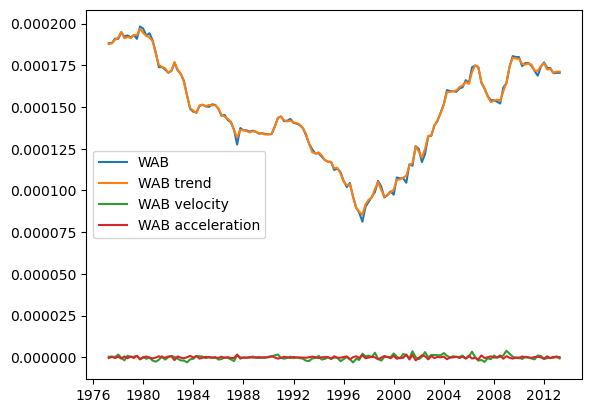

In [18]:
plt.plot(dataM["date"], dataM[['WAB','WAB trend','WAB velocity','WAB acceleration']], label=['WAB','WAB trend','WAB velocity ','WAB acceleration'])
plt.legend()


Plot of average market capitalization (trend, velocity, and acceleration.)

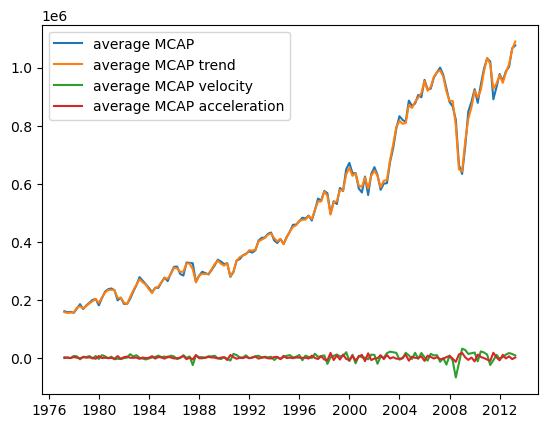

In [19]:
plt.plot(dataM["date"], dataM[['average MCAP','average MCAP trend','average MCAP velocity','average MCAP acceleration']], label=['average MCAP','average MCAP trend','average MCAP velocity','average MCAP acceleration'])
plt.legend()


In [20]:
data.columns

Index(['sp500 return', 'sp500 return trend', 'sp500 velocity',
       'sp500 acceleration', 'Quarter', 'indu return', 'indu return trend',
       'indu velocity', 'indu acceleration', 'GDPC1', 'WPSID62',
       'WPSID62 trend', 'WPSID62 velocity', 'WPSID62 acceleration', 'T10Y2Y',
       'T10Y2Y trend', 'T10Y2Y velocity', 'T10Y2Y acceleration', 'date'],
      dtype='object')

1) The below cells are running the Augmented Dickey-Fuller Test to check for stationary time series data. Granger Causality assumed that the data is stationary, so we need to make that true first

In [21]:
#ADF test for non-m-score data set
data_cols = data.loc[:,~data.columns.isin(["Quarter", "date"])].columns
data_adf = []
for i in data_cols:
    hold = adfuller(data[i])
    data_adf.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

data_adf_df = pd.DataFrame(data_adf, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])

 In the 2023 data set, ndu return, GDPC1, WSPID62, WPSID62 trend, are all non-stationary, so they need to be differenced.

In [22]:
data_adf_df

,Column,Test Statistic,P-Value,Stationary?
0,sp500 return,-7.809705,7.123872e-12,True
1,sp500 return trend,-10.416515,1.748714e-18,True
2,sp500 velocity,-13.387918,4.831638e-25,True
3,sp500 acceleration,-13.587683,2.065296e-25,True
4,indu return,-2.435610,1.319368e-01,False
5,indu return trend,-10.729889,2.998611e-19,True
6,indu velocity,-13.754516,1.035629e-25,True
7,indu acceleration,-13.527539,2.660480e-25,True
8,GDPC1,0.706894,9.899745e-01,False
9,WPSID62,-0.420540,9.066125e-01,False


In [23]:
#ADF test for non-m-score data set
dataM_cols = dataM.loc[:,~dataM.columns.isin(["Quarter", "date", "Count"])].columns
dataM_adf = []
for i in dataM_cols:
    hold = adfuller(dataM[i])
    dataM_adf.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

dataM_adf_df = pd.DataFrame(dataM_adf, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])

In the 2013 data set, we have the same results plus average beta, average MCAP, WAB, average beta trend, average MCAP trend, WAB trend, and WAB velocity are also non-stationary. 

In [24]:
dataM_adf_df

,Column,Test Statistic,P-Value,Stationary?
0,Avg. M-Score,-3.832920,2.587904e-03,True
1,Weighted_M,-4.288413,4.651886e-04,True
2,sp500 return,-6.838989,1.811549e-09,True
3,sp500 return trend,-9.295537,1.148854e-15,True
4,sp500 velocity,-8.117409,1.180768e-12,True
5,sp500 acceleration,-12.376055,5.152632e-23,True
6,indu return,-2.228239,1.961564e-01,False
7,indu return trend,-9.649193,1.450072e-16,True
8,indu velocity,-11.927967,4.856454e-22,True
9,indu acceleration,-12.121411,1.821657e-22,True


Need to difference the non-stationary data to try to make them stationary. Differencing takes the difference with the previous row, or t-1. I first only looked at the columns that needed differencing.

In [25]:
list(data_adf_df[data_adf_df["Stationary?"] == False].Column)

['indu return', 'GDPC1', 'WPSID62', 'WPSID62 trend']

In [26]:
data_non_stat = data.loc[:,list(data_adf_df[data_adf_df["Stationary?"] == False].Column)]
dataM_non_stat = dataM.loc[:,list(dataM_adf_df[dataM_adf_df["Stationary?"] == False].Column)]

data_non_stat_trans = data_non_stat.diff().dropna()
dataM_non_stat_trans = dataM_non_stat.diff().dropna()

data_adf_trans = []
for i in data_non_stat_trans.columns:
    hold = adfuller(data_non_stat_trans[i])
    data_adf_trans.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

data_adf_trans_df = pd.DataFrame(data_adf_trans, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])


dataM_adf_trans = []
for i in dataM_non_stat_trans:
    hold = adfuller(dataM_non_stat_trans[i])
    dataM_adf_trans.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

dataM_adf_trans_df = pd.DataFrame(dataM_adf_trans, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])

After differencing the data, everything is stationary.

In [27]:
display(data_adf_trans_df)
display(dataM_adf_trans_df)

,Column,Test Statistic,P-Value,Stationary?
0,indu return,-6.458333,1.464343e-08,True
1,GDPC1,-16.325114,3.100085e-29,True
2,WPSID62,-3.900012,2.034759e-03,True
3,WPSID62 trend,-3.991740,1.454385e-03,True


,Column,Test Statistic,P-Value,Stationary?
0,indu return,-8.774545,2.469083e-14,True
1,GDPC1,-5.531577,1.782612e-06,True
2,WPSID62,-3.243858,1.758228e-02,True
3,WPSID62 trend,-3.555332,6.674698e-03,True
4,average beta,-11.871818,6.476740e-22,True
5,average MCAP,-10.702339,3.497377e-19,True
6,WAB,-6.582292,7.462010e-09,True
7,average beta trend,-9.353411,8.179873e-16,True
8,average MCAP trend,-8.296953,4.115497e-13,True
9,WAB trend,-7.503597,4.190806e-11,True


From what I can tell, I need to diff the entire data in order to be consistent, and only then can I do granger causality. I created data frames data_diff and dataM_diff that hold the differenced data and then ran the test again, ending up with stationary data.

In [28]:

data_diff = data.drop(columns=["Quarter", "date"], axis=1).diff().dropna()
dataM_diff = dataM.drop(columns=["Quarter", "Count", "date"], axis=1).diff().dropna()

data_diff_adf = []
for i in data_cols:
    hold = adfuller(data_diff[i])
    data_diff_adf.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

data_diff_adf_df = pd.DataFrame(data_diff_adf, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])


dataM_diff_adf = []
for i in dataM_cols:
    hold = adfuller(dataM_diff[i])
    dataM_diff_adf.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

dataM_diff_adf_df = pd.DataFrame(dataM_diff_adf, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])

display(data_diff_adf_df)
display(dataM_diff_adf_df)

,Column,Test Statistic,P-Value,Stationary?
0,sp500 return,-7.109053,3.982983e-10,True
1,sp500 return trend,-7.260385,1.687588e-10,True
2,sp500 velocity,-7.483142,4.714311e-11,True
3,sp500 acceleration,-6.715947,3.581873e-09,True
4,indu return,-6.458333,1.464343e-08,True
5,indu return trend,-6.512309,1.092700e-08,True
6,indu velocity,-7.368797,9.086527e-11,True
7,indu acceleration,-6.474810,1.339334e-08,True
8,GDPC1,-16.325114,3.100085e-29,True
9,WPSID62,-3.900012,2.034759e-03,True


,Column,Test Statistic,P-Value,Stationary?
0,Avg. M-Score,-4.934464,2.986940e-05,True
1,Weighted_M,-6.591185,7.107928e-09,True
2,sp500 return,-5.822276,4.156181e-07,True
3,sp500 return trend,-7.456816,5.484675e-11,True
4,sp500 velocity,-6.878334,1.455036e-09,True
5,sp500 acceleration,-5.682389,8.428006e-07,True
6,indu return,-8.774545,2.469083e-14,True
7,indu return trend,-6.716516,3.570640e-09,True
8,indu velocity,-6.561509,8.358722e-09,True
9,indu acceleration,-5.350613,4.297562e-06,True


2) Kerstin's attempt at testing Causation with Granger's Causality Test. The tests tests the null hypothesis that the coefficients of past values in the regression equation is zero (or that past values of the data do not cause the other series). We want to find the factors that DO cause GDP, therefore that have a p-value less than 0.05 or any other alpha.

In [29]:

def grangers_causation_matrix(data1, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of each variables against GDP.
    The resulting columns are the predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data1      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((1, len(variables))), columns=variables, index=["GDPC1"]) #only need to seewhat variables lag GDP
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data1[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var  for var in variables]
    df.index = ['GDPC1']
    return df

#grangers_causation_matrix(df, variables = df.columns)  

In [30]:
data_diff.head()

,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,indu return,indu return trend,indu velocity,indu acceleration,GDPC1,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,T10Y2Y acceleration
1,0.006660,0.000078,-0.000177,-0.000036,0.008777,0.000344,-1.680028e-04,0.000004,71.035,1.1,0.733333,0.75,-0.425,0.25,0.110250,-0.003750,0.000094
2,-0.006644,-0.000660,0.000152,0.000067,-0.008609,-0.000682,1.166528e-04,0.000019,118.268,2.1,2.800000,0.85,-0.250,-0.06,-0.106875,-0.003292,0.000281
3,0.004914,0.000589,-0.000089,-0.000055,0.006648,0.000078,-8.805833e-05,-0.000051,111.900,-1.1,-0.933333,-2.75,0.625,-0.29,-0.256250,-0.005021,0.000021
4,0.003398,-0.000490,-0.000018,-0.000049,0.005384,-0.000278,1.444444e-07,-0.000050,0.138,-1.8,-2.066667,1.50,0.375,-0.53,-0.409125,0.001937,0.000271
5,-0.005409,-0.000058,-0.000013,0.000082,-0.004233,0.000009,-4.569444e-05,0.000098,20.151,2.7,2.500000,0.90,-0.775,-0.03,-0.166083,0.004354,-0.000417


We run Granger Causality on the DIFFERENCED data, not the initial data because the test assumes that the data is stationary. I chose maxlag=12 because it would cover a 3 year lag (our data is quarterly).

In [31]:
#running granger causality on the data (2023) and dataM df
#first use lag of 12, aka 3 years
maxlag=12
data_granger = grangers_causation_matrix(data_diff, variables=data_diff.columns)
dataM_granger = grangers_causation_matrix(dataM_diff, variables=dataM_diff.columns)

In [32]:

print("Granger Causality results for the 2013 data.\n")
display(dataM_granger) # <= 0.05
print("Granger Causality results for the 2023 data.")
display(data_granger) #<= 0.05

Granger Causality results for the 2013 data.



,Avg. M-Score,Weighted_M,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,indu return,indu return trend,indu velocity,indu acceleration,...,WAB,average beta trend,average MCAP trend,WAB trend,average beta velocity,average beta acceleration,average MCAP velocity,average MCAP acceleration,WAB velocity,WAB acceleration
GDPC1,0.0332,0.0724,0.1304,0.027,0.0618,0.2158,0.099,0.0081,0.033,0.4032,...,0.0001,0.6609,0.0977,0.0007,0.0758,0.521,0.0132,0.0935,0.0003,0.0001


Granger Causality results for the 2023 data.


,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,indu return,indu return trend,indu velocity,indu acceleration,GDPC1,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,T10Y2Y acceleration
GDPC1,0.3802,0.1824,0.0005,0.0945,0.3135,0.2492,0.0007,0.0587,1.0,0.4894,0.629,0.5578,0.1515,0.6439,0.498,0.2056,0.0289


Remember we have two data sets, one that runs until 2023 and one that stops at 2013 (because the M-Score data isn't this far up to date). The 2023 data set only has three variables that lag GDP, while the 2013 data set has 16. I suspect that having the very recent data throws things off, becase there was a completely unpredictable recession in 2020 when the GDP dropped sharply. Since we include all that data from that recession, I think the test is assuming that since a variable did not predict that one, it must not predict any change in GDP. I think we should try again with data restricted to 2019 at the very latest.

In [33]:
display(data_granger[data_granger <= 0.05].dropna(axis=1))
display(dataM_granger[dataM_granger <= 0.05].dropna(axis=1))

,sp500 velocity,indu velocity,T10Y2Y acceleration
GDPC1,0.0005,0.0007,0.0289


,Avg. M-Score,sp500 return trend,indu return trend,indu velocity,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,WAB,WAB trend,average MCAP velocity,WAB velocity,WAB acceleration
GDPC1,0.0332,0.027,0.0081,0.033,0.0,0.0,0.0002,0.0,0.0063,0.0347,0.0078,0.0001,0.0007,0.0132,0.0003,0.0001


Here I reduced created a data frame that has all data before 2020. The first ADF test revealed some non-stationary variables so I differenced the data and then ran it again to a 100% success rate.

In [34]:
data_red = data.loc[data.date < "2020"]

#ADF test for non-m-score data set
#data_cols = data.loc[:,~data.columns.isin(["Quarter", "date"])].columns
data_red_adf = []
for i in data_cols:
    hold = adfuller(data_red[i])
    data_red_adf.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

data_red_adf_df = pd.DataFrame(data_red_adf, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])
#data_red_adf_df
data_red_diff = data_red.drop(columns=["Quarter", "date"], axis=1).diff().dropna()

data_red_diff_adf = []
for i in data_cols:
    hold = adfuller(data_red_diff[i])
    data_red_diff_adf.append([i, hold[0], hold[1], hold[1] < 0.05]) #if p value is less than 0.05, we reject and therefore the time series is stationary

data_red_diff_adf_df = pd.DataFrame(data_red_diff_adf, columns=["Column", "Test Statistic", "P-Value", "Stationary?"])
data_red_diff_adf_df



,Column,Test Statistic,P-Value,Stationary?
0,sp500 return,-6.593043,7.036081e-09,True
1,sp500 return trend,-6.869072,1.532150e-09,True
2,sp500 velocity,-7.192105,2.488226e-10,True
3,sp500 acceleration,-6.469292,1.379983e-08,True
4,indu return,-6.070461,1.154192e-07,True
5,indu return trend,-7.306225,1.299405e-10,True
6,indu velocity,-6.935038,1.059978e-09,True
7,indu acceleration,-6.134826,8.235167e-08,True
8,GDPC1,-8.482650,1.379793e-13,True
9,WPSID62,-3.524216,7.386534e-03,True


I then ran the Granger's Causality algorithm again, revealing a larger numer of varaibles that lag GDP.

In [35]:
data_red_granger = grangers_causation_matrix(data_red_diff, variables=data_red_diff.columns)

In [36]:
print("Non-M-Score data up to 2019 \n")
display(data_red_granger[data_red_granger <= 0.05].dropna(axis=1))
print("Non-M-Score data up to 2023 \n")
display(data_granger[data_granger <= 0.05].dropna(axis=1))
print("M-Score data up to 2013 \n")
display(dataM_granger[dataM_granger <= 0.05].dropna(axis=1))

Non-M-Score data up to 2019 



,sp500 return trend,indu return trend,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y velocity
GDPC1,0.0395,0.0273,0.0072,0.0041,0.0289,0.0217,0.0494,0.0261


Non-M-Score data up to 2023 



,sp500 velocity,indu velocity,T10Y2Y acceleration
GDPC1,0.0005,0.0007,0.0289


M-Score data up to 2013 



,Avg. M-Score,sp500 return trend,indu return trend,indu velocity,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,WAB,WAB trend,average MCAP velocity,WAB velocity,WAB acceleration
GDPC1,0.0332,0.027,0.0081,0.033,0.0,0.0,0.0002,0.0,0.0063,0.0347,0.0078,0.0001,0.0007,0.0132,0.0003,0.0001


As I thought, we have more variables that lag GDP when we restrict our data to being before 2020. In fact, all the variables are also present in the data set that include M-Score, WAB, and MCAP. I really believe we should proceed with the data set that is restricted to 2013. It has all the variables that we would want to look at anyways and that way we don't need to worry about choosing the time point to restrict the data at.

# Finding the Order of the VAR model:
Using all of the dataM variables where dataM_granger <= 0.5, we will construct models with various orders and chose the best order based on the lowest AIC value:

In [37]:
# We will use a variation on this method to construct VAR models: 
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
# first import the required libraries.
from statsmodels.tsa.api import VAR


In [38]:
def best_order(df_differenced): # takes a dataframe of time series columns (differenced to make them staitonary) and calculates the bet order for a VAR model.
    model = VAR(df_differenced)
    orders = list(range(1,13)) # try orders 1-12
    aic_list = [] # store aic values used to evaluate order here
    for order in orders: 
        result = model.fit(order)
        aic_list.append(result.aic)
        
    plt.plot(orders, aic_list)
    plt.xlabel('Order')
    plt.ylabel('AIC')
    plt.show()



Note: The best_order function gives an error for some reason. It is not crucial for completing the rest of the model as Eddie's work shows that we should use order=3, I will comment if out for now. 

In [39]:
dataM_granger_pass = dataM_granger[dataM_granger <= 0.05].dropna(axis=1) # all columns the lag GDP at the 5% significance level.
selected_cols = list(dataM_granger_pass.columns) # columns of interest from dataM
selected_cols = ['GDPC1'] + selected_cols # insert GDP as first column of interest
df_differenced = dataM_diff[selected_cols]
df_original = dataM[selected_cols] # Original dataset used to make train and test sets to plot later

display(df_differenced.head())
display(df_original.head())

#best_order(df_differenced)

,GDPC1,Avg. M-Score,sp500 return trend,indu return trend,indu velocity,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,WAB,WAB trend,average MCAP velocity,WAB velocity,WAB acceleration
1,0.138,0.036871,-0.000490,-0.000278,1.444444e-07,-1.8,-2.066667,1.50,0.375,-0.53,-0.409125,0.001937,7.873275e-08,4.978428e-07,-2696.665376,3.212032e-08,6.974916e-07
2,20.151,-0.013176,-0.000058,0.000009,-4.569444e-05,2.7,2.500000,0.90,-0.775,-0.03,-0.166083,0.004354,2.634895e-06,2.132972e-06,-326.885484,-2.521892e-07,-7.372190e-07
3,244.757,0.142755,0.001702,0.002090,2.662444e-04,3.4,3.733333,0.90,0.225,-0.11,-0.062000,-0.002771,-1.092079e-07,1.345866e-06,7475.846862,1.479422e-06,8.104807e-07
4,66.149,-0.094602,-0.000291,-0.000549,-9.425278e-05,4.8,3.766667,-1.15,-0.975,-0.31,-0.225542,-0.001521,3.820992e-06,3.372568e-06,-1478.972657,-1.836159e-06,-1.128147e-06
5,89.315,0.015691,-0.001192,-0.001180,-1.108028e-04,0.5,1.400000,0.95,1.200,-0.28,-0.416500,-0.003167,-2.397804e-06,-3.810814e-06,-10177.331610,-1.654264e-06,1.299681e-06


,GDPC1,Avg. M-Score,sp500 return trend,indu return trend,indu velocity,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,WAB,WAB trend,average MCAP velocity,WAB velocity,WAB acceleration
0,6313.559,-2.928935,0.000019,-0.000424,-0.000023,65.5,65.933333,-1.45,0.300,1.12,1.036417,-0.007271,0.000188,0.000188,1596.925166,4.257808e-07,-3.720542e-07
1,6313.697,-2.892064,-0.000471,-0.000702,-0.000023,63.7,63.866667,0.05,0.675,0.59,0.627292,-0.005333,0.000188,0.000188,-1099.740210,4.579012e-07,3.254375e-07
2,6333.848,-2.905240,-0.000529,-0.000693,-0.000069,66.4,66.366667,0.95,-0.100,0.56,0.461208,-0.000979,0.000191,0.000190,-1426.625694,2.057119e-07,-4.117815e-07
3,6578.605,-2.762485,0.001173,0.001397,0.000197,69.8,70.100000,1.85,0.125,0.45,0.399208,-0.003750,0.000191,0.000192,6049.221168,1.685134e-06,3.986992e-07
4,6644.754,-2.857087,0.000882,0.000848,0.000103,74.6,73.866667,0.70,-0.850,0.14,0.173667,-0.005271,0.000195,0.000195,4570.248510,-1.510248e-07,-7.294480e-07


The first local minima occurs at order = 3. So this is what I will try for the first model.
Now let's break the data into a training set that goes from the 1970s up to just before the 2008 great recession, and a test set that goes past the end of the great recession (~June 2009).

In [40]:
idx_2007Q3 = dataM.index[dataM['Quarter'] == '2007Q3'][0] # Identify the final index of the training set
print(idx_2007Q3)
idx_2010Q1 = dataM.index[dataM['Quarter'] == '2010Q1'][0] # Identify the final index of the test set
train1_idx = list(range(0, idx_2007Q3))
print(train1_idx[-1]) # what is the idx of the last element?
more_steps = 5 # forecast ahead an additional number of quarters beyond the lag order.
test1_idx = list(range(idx_2007Q3, idx_2010Q1 + more_steps))
train1 = df_differenced.iloc[train1_idx]
test1 = df_differenced.iloc[test1_idx]
# Use these later for plotting
train_original = df_original.iloc[train1_idx]
test_original = df_original.iloc[test1_idx]

# check shapes of dfs:
print(train1.shape)
print(test1.shape)

121
120
(121, 17)
(15, 17)


In [41]:
model1 = VAR(train1)
m1_fitted = model1.fit(12) # order = 3 based on local minima in AIC
lag_order = m1_fitted.k_ar # check lag order of model
print(lag_order)  

12


/Users/lukaszsledz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
from statsmodels.stats.stattools import durbin_watson

These values changed when I (Kerstin) ran the notebook.

In [43]:
out = durbin_watson(m1_fitted.resid)

for col, val in zip(train1.columns, out):
    print('{} : {}'.format(col, round(val, 2)))

GDPC1 : 2.26
Avg. M-Score : 2.4
sp500 return trend : 1.74
indu return trend : 2.23
indu velocity : 2.19
WPSID62 : 1.71
WPSID62 trend : 2.24
WPSID62 velocity : 1.9
WPSID62 acceleration : 1.77
T10Y2Y : 2.13
T10Y2Y trend : 2.05
T10Y2Y velocity : 2.02
WAB : 2.38
WAB trend : 2.28
average MCAP velocity : 2.38
WAB velocity : 2.34
WAB acceleration : 2.25


Durbin Watson statistic close to 2 indicates little serial correlation. DW statistic for Weighted Aveage Beta 'WAB' is a little high. We can try increasing the order, but it might actually be better to exclude the original variables where 'trend' columns are included. For example, we could try removing 'WAB' and keeping 'WAB' trend. For now I will continue on with this model. 

In [44]:
# Check the indicies here!

end_idx = idx_2007Q3 + lag_order + more_steps # Just decided to forecast ahead 5 quarters to see what happens.
forecast_input = df_differenced.values[idx_2007Q3 : end_idx]
# Create the first forecast
# Forecast
fc = m1_fitted.forecast(y=forecast_input, steps=lag_order + more_steps)
df_diff_forecast = pd.DataFrame(fc, index=df_differenced.index[idx_2007Q3 : end_idx], columns=df_differenced.columns)
df_diff_forecast

# If this is correct then I need to "inverse difference" the forecast then plot it next to the actual data.

,GDPC1,Avg. M-Score,sp500 return trend,indu return trend,indu velocity,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,WAB,WAB trend,average MCAP velocity,WAB velocity,WAB acceleration
122,-103.032277,-0.348773,0.007989,0.006719,0.000714,16.047770,2.159825,1.015902,-18.302924,0.268252,-0.917016,-0.035131,0.000030,0.000006,34828.189187,-1.950854e-05,-9.660074e-06
123,170.900589,0.486464,0.008296,0.013524,-0.000304,-66.510529,-59.614353,-12.650129,30.673755,-3.722192,-2.137923,-0.021245,-0.000020,-0.000025,68277.177740,-1.109877e-05,5.178609e-06
124,-151.490093,0.277085,0.001173,0.002655,-0.000048,1.810514,22.295619,39.096001,-7.343328,-1.458090,-1.346047,0.028792,0.000013,0.000011,1715.502756,-7.742017e-06,-5.370571e-06
125,-57.900592,0.179757,-0.006531,-0.010957,0.000156,29.715903,22.330710,-24.425996,8.609107,-0.206808,-1.003271,-0.017882,0.000007,0.000004,-65129.345403,8.772953e-07,5.139316e-06
126,4.530401,0.959797,0.028056,0.025143,-0.000563,-20.725411,-10.800728,-28.072483,14.020992,-2.572914,-2.235471,-0.012123,0.000002,-0.000003,203475.143098,8.544821e-07,-6.271660e-06
127,494.485965,0.328016,-0.024720,-0.025626,-0.000729,51.937933,45.730944,22.206435,-25.934405,-2.726542,-1.897619,0.007055,-0.000023,-0.000002,-274404.710063,1.287355e-05,1.036233e-05
128,294.707437,0.621174,0.007825,0.006012,0.002499,22.305019,7.070043,-34.596581,4.311051,-1.617553,-1.415893,0.037052,0.000013,-0.000004,78942.957085,-1.046378e-05,-1.059353e-05
129,450.352882,-1.257498,-0.013798,-0.014280,-0.000872,58.296793,66.117474,73.007464,-12.335965,1.351739,-0.948496,-0.012136,-0.000027,-0.000021,-100218.889611,1.218409e-05,9.170820e-06
130,155.983041,0.496942,-0.007278,-0.006271,0.001334,97.657519,111.291440,15.714661,-1.811816,-3.019162,-0.837325,0.000334,0.000031,0.000036,-26171.625133,1.400765e-05,-2.203140e-06
131,-161.085618,0.251446,0.008348,0.009445,0.000171,4.610431,9.600440,-32.937064,25.099265,0.684041,-0.053656,0.045328,0.000029,0.000031,84437.974504,-9.726150e-06,-5.357632e-06


In [45]:
# "Inverse difference" the forecasted data using the method from "Hands-on Time Series Analysis with Python":

def inverse_diff(actual_df, pred_df): # function to apply inverse difference to VAR forecast.
    df_res = pred_df.copy()    
    columns = actual_df.columns    
    for col in columns:        
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()    
    return df_res


,GDPC1,Avg. M-Score,sp500 return trend,indu return trend,indu velocity,WPSID62,WPSID62 trend,WPSID62 velocity,WPSID62 acceleration,T10Y2Y,T10Y2Y trend,T10Y2Y velocity,WAB,WAB trend,average MCAP velocity,WAB velocity,WAB acceleration
0,6313.559,-2.928935,0.000019,-0.000424,-0.000023,65.5,65.933333,-1.45,0.300,1.12,1.036417,-0.007271,0.000188,0.000188,1596.925166,4.257808e-07,-3.720542e-07
1,6313.697,-2.892064,-0.000471,-0.000702,-0.000023,63.7,63.866667,0.05,0.675,0.59,0.627292,-0.005333,0.000188,0.000188,-1099.740210,4.579012e-07,3.254375e-07
2,6333.848,-2.905240,-0.000529,-0.000693,-0.000069,66.4,66.366667,0.95,-0.100,0.56,0.461208,-0.000979,0.000191,0.000190,-1426.625694,2.057119e-07,-4.117815e-07
3,6578.605,-2.762485,0.001173,0.001397,0.000197,69.8,70.100000,1.85,0.125,0.45,0.399208,-0.003750,0.000191,0.000192,6049.221168,1.685134e-06,3.986992e-07
4,6644.754,-2.857087,0.000882,0.000848,0.000103,74.6,73.866667,0.70,-0.850,0.14,0.173667,-0.005271,0.000195,0.000195,4570.248510,-1.510248e-07,-7.294480e-07


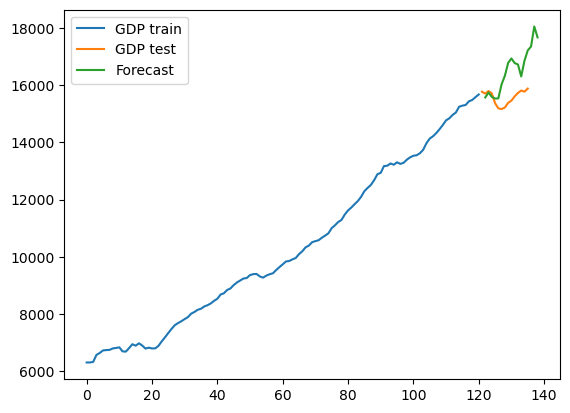

In [46]:
final_forecast = inverse_diff(train_original, df_diff_forecast)

display(train_original.head())
# Now let's plot this:
plt.plot(train1_idx, train_original['GDPC1'], label = 'GDP train')
plt.plot(test1_idx, test_original['GDPC1'], label = 'GDP test')
plt.plot(df_differenced.index[idx_2007Q3 : end_idx], final_forecast['GDPC1_1st_inv_diff'], label = 'Forecast')
plt.legend()
plt.show()

Here we will take another look at the correlation of the vairables. Our forecast does not look to be too accurate so I will refine the model some more.

The cointegration test helps to establish the presence of a long run, statistically significant relationship between variables. If no relationship exists then we can't even make a VAR model.

In [47]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

Running a cointegration test on our originl data shows that there is no cointegration between our variables and GDP. When we run it with the differenced data, they are all cointegrated. I'm unclear on how we should look at this test for a few reasons. Cointegration tests are supposed to be in on non-stationary data, and df_original is not completely stationary as seen before so this shouls be fine. But we make the model with our differenced data, so does that mean that we are supposed to be testing that? I think we can proceed with a VAR model with the differenced data with the understanding that the untransformed variables are not cointegrated.

In [48]:
import statsmodels.tsa.stattools as ts
results = []
for col in selected_cols[1:]:
    results.append(ts.coint(df_original.GDPC1, df_original[col])[1])

cointegration = pd.DataFrame()
cointegration["Column"] = selected_cols[1:]
cointegration["P_Value"] = [float(i) for i in results]
#display(cointegration)
cointegration["Cointegrated_with_GDP?"] = cointegration.P_Value < 0.05
cointegration

#coint_johansen(df_original,-1,1).result

,Column,P_Value,Cointegrated_with_GDP?
0,Avg. M-Score,0.986614,False
1,sp500 return trend,0.967153,False
2,indu return trend,0.966716,False
3,indu velocity,0.982845,False
4,WPSID62,0.660456,False
5,WPSID62 trend,0.671976,False
6,WPSID62 velocity,0.974743,False
7,WPSID62 acceleration,0.980727,False
8,T10Y2Y,0.708087,False
9,T10Y2Y trend,0.776483,False


In [49]:
"""
def cointegration_test(df, alpha=0.05): 
    out = coint_johansen(df,-1,1)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_differenced)
"""

'\ndef cointegration_test(df, alpha=0.05): \n    out = coint_johansen(df,-1,1)\n    d = {\'0.90\':0, \'0.95\':1, \'0.99\':2}\n    traces = out.lr1\n    cvts = out.cvt[:, d[str(1-alpha)]]\n    def adjust(val, length= 6): return str(val).ljust(length)\n\n    # Summary\n    print(\'Name   ::  Test Stat > C(95%)    =>   Signif  \n\', \'--\'*20)\n    for col, trace, cvt in zip(df.columns, traces, cvts):\n        print(adjust(col), \':: \', adjust(round(trace,2), 9), ">", adjust(cvt, 8), \' =>  \' , trace > cvt)\n\ncointegration_test(df_differenced)\n'

I used vif to look for collinear variables. THere are quite a few here. I believe that the problem lies within the variables that are derived from each other, (e.g. WAB and WAB trend are highly related. But I'm not sure which one to keep based off of just this.)

In [50]:
#vif test for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_df = pd.DataFrame() 
vif_df["feature"] = df_differenced.columns
vif_df["VIF"] = [variance_inflation_factor(df_differenced.values, i) 
                          for i in range(len(df_differenced.columns))]
vif_df["DW"] = out

Looking back at the Durbin-Watson results, we can see which variables have serially correlated residuals. The test results are in the range 0-4, with values closest to 2 indicating no serial correlation. I used a combination of these two tests to decide which variables to keep. For example, the VIF results would tell us that WAB velocity and acceleration would be good to keep, but they have very high Durbin-Watson values so they were eliminated. WAB and WAB trend have high VIF values, leanding me to think that they are collinear, so I only kept WAB since it had the lowest DW value. Similar reasoning was used for WPSID62 and T10Y2Y. Avg. MCAP velocity is not collinear with anything, but it has a high DW result. The stock index return trends are highly correlated with each other. I chose to keep indu because of its lower DW. I tested the model with the sp500 and it was not as accurate of a forecast. Including indu velocity results in some crazy behavior so that was eliminated, even though it does not seem to be correlated with the indu return trend.

In [51]:
vif_df

,feature,VIF,DW
0,GDPC1,1.276763,2.256436
1,Avg. M-Score,1.129018,2.400546
2,sp500 return trend,13.518794,1.743176
3,indu return trend,10.912782,2.229454
4,indu velocity,1.221524,2.187425
5,WPSID62,40.774993,1.711542
6,WPSID62 trend,31.010061,2.240591
7,WPSID62 velocity,1.477961,1.901592
8,WPSID62 acceleration,3.730820,1.766043
9,T10Y2Y,2.718899,2.127993


Below are the selected columns, and their cointegration results.

In [52]:
selected_cols_reduce = ['GDPC1',
 'Avg. M-Score',
 'indu return trend',
 'WPSID62 acceleration',
 'T10Y2Y', 'T10Y2Y trend',
'T10Y2Y velocity',
 'WAB']

results2 = []
for col in selected_cols_reduce[1:]:
    results2.append(ts.coint(df_original.GDPC1, df_original[col])[1])

cointegration2 = pd.DataFrame()
cointegration2["Column"] = selected_cols_reduce[1:]
cointegration2["P_Value"] = [float(i) for i in results2]
#display(cointegration)
cointegration2["Cointegrated_with_GDP?"] = cointegration2.P_Value < 0.05
cointegration2

,Column,P_Value,Cointegrated_with_GDP?
0,Avg. M-Score,0.986614,False
1,indu return trend,0.966716,False
2,WPSID62 acceleration,0.980727,False
3,T10Y2Y,0.708087,False
4,T10Y2Y trend,0.776483,False
5,T10Y2Y velocity,0.980864,False
6,WAB,0.985697,False


GDPC1 : 1.71
Avg. M-Score : 1.95
indu return trend : 1.57
WPSID62 acceleration : 1.95
T10Y2Y : 2.61
T10Y2Y trend : 2.03
T10Y2Y velocity : 1.69
WAB : 1.55


/Users/lukaszsledz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


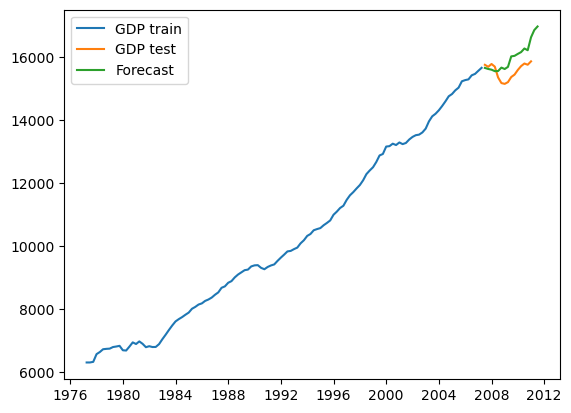

In [53]:
df_original_red = df_original[selected_cols_reduce]
df_differenced_red = df_differenced[selected_cols_reduce]


more_steps = 5 # forecast ahead an additional number of quarters beyond the lag order.
train1_red = df_differenced_red.iloc[train1_idx]
test1_red = df_differenced_red.iloc[test1_idx]
# Use these later for plotting
train_original_red = df_original_red.iloc[train1_idx]
test_original_red = df_original_red.iloc[test1_idx]

model2 = VAR(train1_red)
m2_fitted = model2.fit(12) # order = 3 based on local minima in AIC
lag_order2 = m2_fitted.k_ar # check lag order of model
#print(lag_order2)  

out2 = durbin_watson(m2_fitted.resid)

for col, val in zip(train1_red.columns, out2):
    print('{} : {}'.format(col, round(val, 2)))

end_idx = idx_2007Q3 + lag_order + more_steps # Just decided to forecast ahead 5 quarters to see what happens.
forecast_input2 = df_differenced_red.values[idx_2007Q3 : end_idx]
# Create the first forecast
# Forecast
fc2 = m2_fitted.forecast(y=forecast_input2, steps=lag_order + more_steps)
df_diff_forecast2 = pd.DataFrame(fc2, index=df_differenced_red.index[idx_2007Q3 : end_idx], columns=df_differenced_red.columns)
#df_diff_forecast2

final_forecast2 = inverse_diff(train_original_red, df_diff_forecast2)

#display(train_original.head())
# Now let's plot this:
plt.plot(dataM.date.iloc[train1_idx], train_original_red['GDPC1'], label = 'GDP train')
plt.plot(dataM.date.iloc[test1_idx], test_original_red['GDPC1'], label = 'GDP test')
plt.plot(dataM.date.iloc[idx_2007Q3 : end_idx], final_forecast2['GDPC1_1st_inv_diff'], label = 'Forecast')
plt.legend()
plt.show()



In [54]:
vif_df2 = pd.DataFrame() 
vif_df2["feature"] = df_differenced_red.columns
vif_df2["VIF"] = [variance_inflation_factor(df_differenced_red.values, i) 
                          for i in range(len(df_differenced_red.columns))]
vif_df2["DW"] = out2
vif_df2

,feature,VIF,DW
0,GDPC1,1.096975,1.713546
1,Avg. M-Score,1.029650,1.949064
2,indu return trend,1.181112,1.572576
3,WPSID62 acceleration,1.016978,1.949277
4,T10Y2Y,2.453307,2.609862
5,T10Y2Y trend,2.601756,2.033946
6,T10Y2Y velocity,1.122330,1.686520
7,WAB,1.192629,1.552920


This forecast looks so much better. We don't have the dramatic increases and decreases of the last one. None of the variables have a VIF > 5 so there is no evidence of multicollinearity. The DW results go from 1.5 to 2.6 but we get our best forecast so I think it is ok.

In [84]:
# Calculate mean squared error from these two values
# Forcast - Actual = Mean Squared Error 
import numpy as np
from statsmodels.tsa.stattools import acf


def forecast_accuracy(forcast, actual):
    mse = np.mean((forcast - actual)**2)

    return({'mse':mse})

print('Forcast Accuracy of: final_forcast')
accuracy_prob = forecast_accuracy(final_forecast['GDPC1_1st_inv_diff'], test_original['GDPC1'])
print(accuracy_prob)

# model 1
# test_original['GDPC1'] 
# final_forecast['GDPC1_1st_inv_diff']

print('Forcast Accuracy of: final_forcast2')
accuracy_prob = forecast_accuracy(final_forecast2['GDPC1_1st_inv_diff'], test_original_red['GDPC1'])
print(accuracy_prob)

# # model 2
# test_original_red['GDPC1'] 
# final_forecast2['GDPC1_1st_inv_diff']


Forcast Accuracy of: final_forcast
{'mse': 843327.1856525306}
Forcast Accuracy of: final_forcast2
{'mse': 140874.99583663009}


In [ ]:
# Based off these numbers it looks like model 2 is better. 
# The mse are very high, will need to dig into this to 
# see if I am missing something with the calculation